In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, max_error


Data with initial features
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data with selected features
     0    1    2
0  3.5  1.4  0.2
1  3.0  1.4  0.2
2  3.2  1.3  0.2
3  3.1  1.5  0.2
4  3.6  1.4  0.2



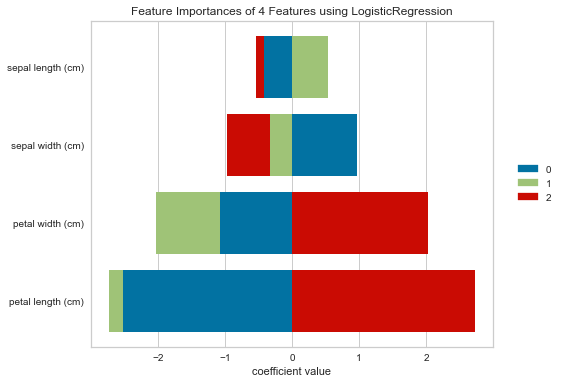

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 4 Features using LogisticRegression'}, xlabel='coefficient value'>,
                   estimator=LogisticRegression(max_iter=150),
                   labels=['sepal length (cm)', 'sepal width (cm)',
                           'petal length (cm)', 'petal width (cm)'],
                   relative=False, stack=True)


In [8]:
# Backward Elimination
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import feature_importances

iris = load_iris()
X = iris.data
y = iris.target

estimator = LogisticRegression(max_iter=150)
selector = RFE(estimator, n_features_to_select=3, step=1)
selector.fit(X, y)
X_selected = selector.transform(X)

print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(X_selected).head())
print()
print(feature_importances(estimator, X, y, stack=True,
                          labels=iris.feature_names, relative=False))

In [9]:
df = pd.read_csv('data/20days_supervised.csv')

In [13]:
X = df[df.columns[~df.columns.isin(
    ['datecol', 'target','trade_date','target_1','target_2','target_3'])]]
#y = df[['target_1','target_2','target_3']]
y = df['target_1']

#X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y),test_size=.7,random_state =123)
print(np.shape(X))

(1943, 2680)


In [25]:
estimator = xgb.XGBClassifier()
selector = RFE(estimator, n_features_to_select=100, step=1)
selector.fit(X, y)
X_selected = selector.transform(X)

print('Data with initial features')
print(pd.DataFrame(X, columns=iris.feature_names).head())
print()
print('Data with selected features')
print(pd.DataFrame(X_selected).head())
print()
print(feature_importances(estimator, X, y, stack=True,
                          labels=X.columns, relative=False))


KeyboardInterrupt: 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']